In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
features = df.columns[:-1]
X = df[features]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [8]:
print('Confusion matrix: ')
print(metrics.confusion_matrix(y_test,y_pred))
print('\nAccuracy: ')
print(metrics.accuracy_score(y_test,y_pred))

Confusion matrix: 
[[118  38]
 [ 24  51]]

Accuracy: 
0.7316017316017316


In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/home/vkmanojk/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


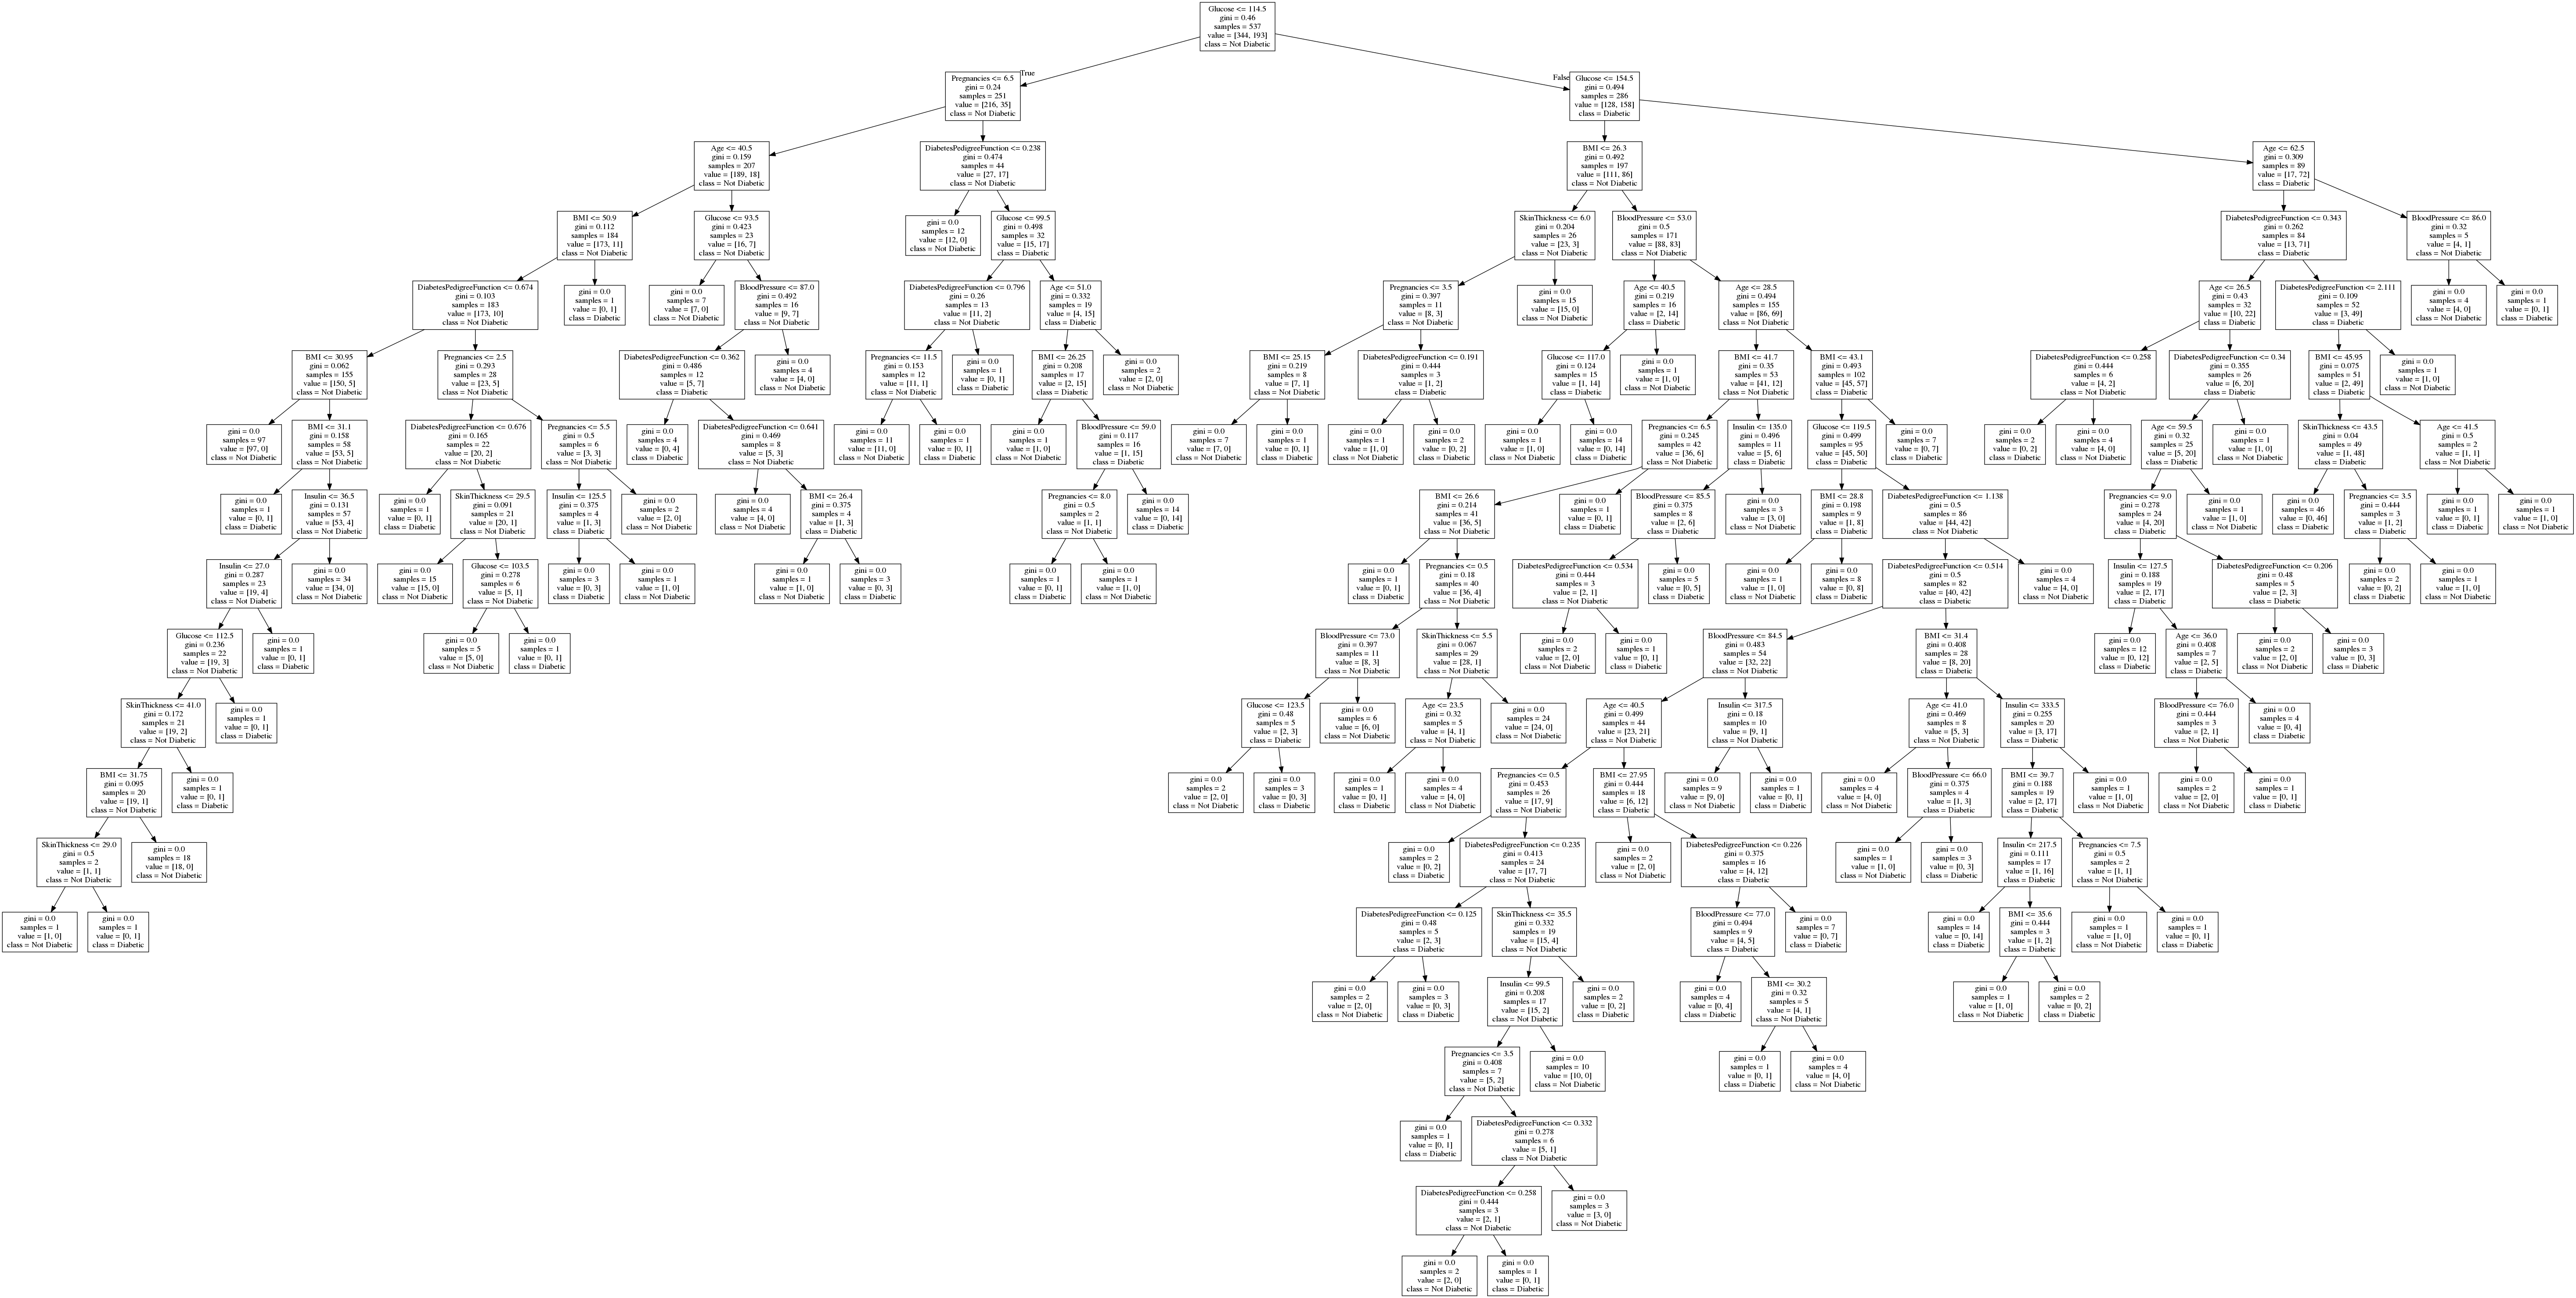

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, feature_names = features, class_names = ['Not Diabetic','Diabetic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes_Classification.png')
Image(graph.create_png())

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
print('Confusion matrix: ')
print(metrics.confusion_matrix(y_test,y_pred))
print('\nAccuracy: ')
print(metrics.accuracy_score(y_test,y_pred))

Confusion matrix: 
[[150   6]
 [ 55  20]]

Accuracy: 
0.7359307359307359


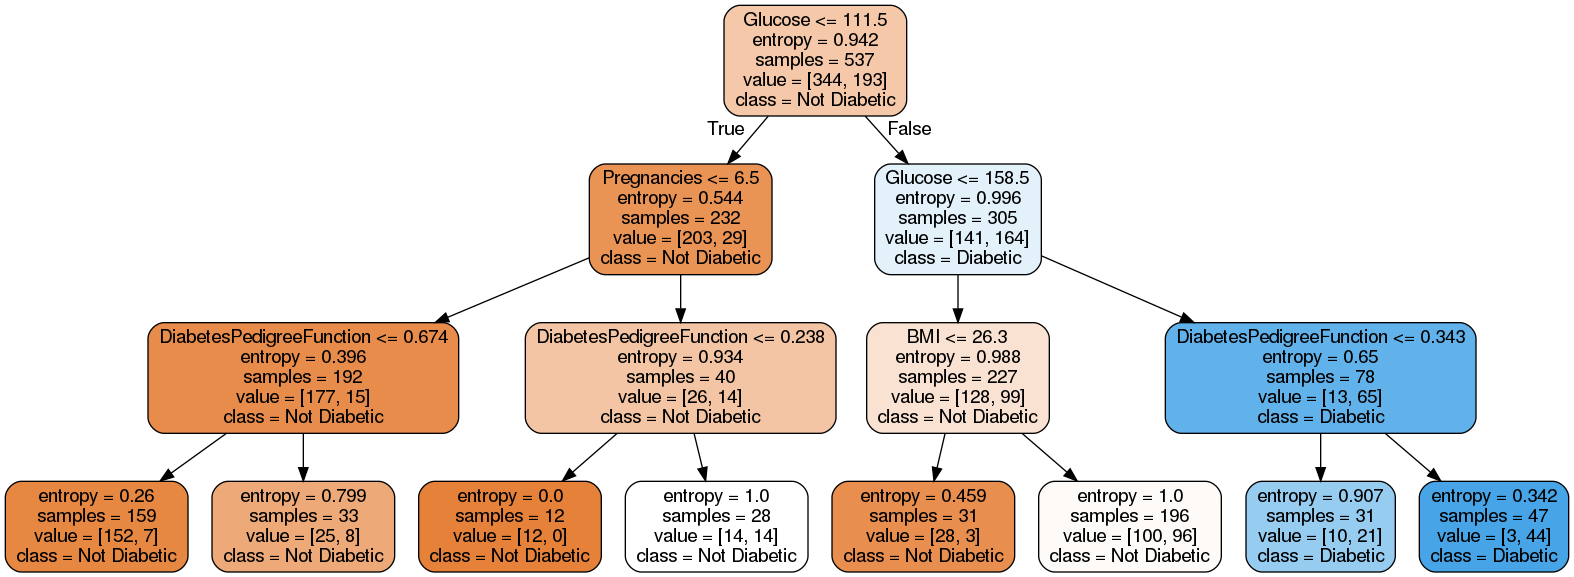

In [13]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True,
                rounded = True, feature_names = features, 
                class_names = ['Not Diabetic','Diabetic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes_Classification1.png')
Image(graph.create_png())